# Aula 12 (26/11/2019)

## Arrays com Numpy (continuação)

In [2]:
import numpy as np

**Cópias e vistas**

Ao operar com *arrays*, os dados são às vezes copiados em um novo *array* e às vezes não, o que pode confundir iniciantes. Por exemplo, atribuições simples não criam cópias do *array*, i.e. elas apenas criam ponteiros para o mesmo objeto:

In [11]:
a = np.arange(12)
b = a  # 'b' é um pointeiro que aponta ao mesmo valor que 'a' 
print(b is a)

b.shape = 3,4  # outra forma de mudar a forma de um array
print(a.shape)  # o comando acima muda a forma de a também

True
(3, 4)


Ao chamar funções, Python passa objetos mutáveis como referências, portanto quando um *array* é passado como argumento para uma função, o mesmo objeto estará disponível no escopo da função chamada. Isto é, a função não recebe os valores do objeto, mas um ponteiro para esses valores:

In [5]:
# Exemplo: a função id() verifica o endereço de memória em que o vlaor de uma variável está guardado.
# Issopode ser usado para verificar se dois objetos são na verdade o mesmo. 
def f(x):
    print(id(x))

print(id(a))
f(a)

560789256752
560789256752


O método *view* cria um novo objeto, mas esse novo objeto "olha" para os mesmos dados, ou seja, ele é uma "vista". Vejamos:

In [12]:
# 'a' é uma vista de 'c'.
c = a.view()
print(c is a)
print(c.base is a)

# Observe que alterar a forma de 'c' não altera a forma de 'a'...
c.shape = 2,6
print(a.shape)

# ...mas alterar algum valor de 'c' também altera esse valor em 'a'. 
c[0,4] = 1234
print(a)

# Ou seja, tanto 'c' quanto 'a' apontam para os mesmos endereços de mémória,
# mas representam seus valores de maneiras diferentes.

False
True
(3, 4)
[[   0    1    2    3]
 [1234    5    6    7]
 [   8    9   10   11]]


Uma fatia de um array retorna uma vista:

In [13]:
# 's' contém uma fatia de valores de 'a'.
s = a[:,1:3]
print(s)

# Alterar os valores de 's' também os altera em 'a.'
s[:] = 10
print(a)

[[ 1  2]
 [ 5  6]
 [ 9 10]]
[[   0   10   10    3]
 [1234   10   10    7]
 [   8   10   10   11]]


Para obter uma cópia independente de um *array*, usa-se o método *copy*:

In [15]:
# 'd' é uma cópia de 'a': mesmos valores, mas em endereços de memória diferentes.
d = a.copy()
print(d is a)
print(d.base is a)

d[0,0] = 9999
print(a)
print(d)

False
False
[[   0   10   10    3]
 [1234   10   10    7]
 [   8   10   10   11]]
[[9999   10   10    3]
 [1234   10   10    7]
 [   8   10   10   11]]


**Álgebra linear**

A maior parte das funções de álgebra linear de NumPy estão disponíveis no módulo *np.linalg*. Algumas funções importantes incluem calcular a inversa de uma matriz:

In [20]:
a = np.array([[1.0, 2.0], [3.0, 4.0]])
b = np.linalg.inv(a)
print(b)

a.dot(b)

[[-2.   1. ]
 [ 1.5 -0.5]]


array([[1.00000000e+00, 1.11022302e-16],
       [0.00000000e+00, 1.00000000e+00]])

Calcular a pseudoinversa de uma matriz (se a matriz for invertível, a inversa será calculada):

In [21]:
print(np.linalg.pinv(a))

[[-2.   1. ]
 [ 1.5 -0.5]]


Calcular o determinante e o traço de uma matriz:

In [23]:
print(np.linalg.det(a))
print(np.trace(a))  # o traço está disponível no próprio np

-2.0000000000000004
5.0


Obter a diagonal de uma matriz como um vetor:

In [25]:
np.diag(a)

array([1., 4.])

Obter uma matriz diagonal a partir de um vetor:

In [29]:
d = np.diag(a)
print(d)
np.diag(d)

[1. 4.]


array([[1., 0.],
       [0., 4.]])

Resolve um sistema de equações lineares:

In [32]:
y = np.array([[5.0], [7.0]])
np.linalg.solve(a, y)

array([[-3.],
       [ 4.]])

In [33]:
np.linalg.eig(a)  # retorna uma tupla (autovalores, autovetores)

(array([-0.37228132,  5.37228132]), array([[-0.82456484, -0.41597356],
        [ 0.56576746, -0.90937671]]))

**Ordenando arrays** 
NumPy oferece algumas funções para ordenar *arrays*. A principal delas é a função *sort*, que retorna uma cópia ordenada do *array* passado como parâmetro

In [35]:
a = np.array([12, 9, 13, -1, 0, -4, 2, 7, 1])
print(np.sort(a))
print(a)

[-4 -1  0  1  2  7  9 12 13]
[12  9 13 -1  0 -4  2  7  1]


Caso a seja um *array* multidimensional, pode-se usar o parâmetro *axis* para indicar através de qual eixo a ordenação deve ser feita.

In [38]:
b = np.array([[12, 9, 13], [-1, 0, -4], [2, 7, 1]])
print(b)
print()
print(np.sort(b, axis = None))  # se axis for None, o array é aplainado antes de ordenar
print()
print(np.sort(b, axis = 0))  # axis = 0 irá ordenar através das linhas
print()
print(np.sort(b, axis = 1))  # axis = 1 irá ordenar através das colunas
print()
print(b)

[[12  9 13]
 [-1  0 -4]
 [ 2  7  1]]

[-4 -1  0  1  2  7  9 12 13]

[[-1  0 -4]
 [ 2  7  1]
 [12  9 13]]

[[ 9 12 13]
 [-4 -1  0]
 [ 1  2  7]]

[[12  9 13]
 [-1  0 -4]
 [ 2  7  1]]


Também é possível escolher o algoritmo de ordenação usando o parâmetro *kind* (cujo valor padrão é 'quicksort'):

In [39]:
print(np.sort(a, kind = 'mergesort'))

[-4 -1  0  1  2  7  9 12 13]


Outra função importante é *argsort*, que ao invés de retornar o *array* ordenado, retorna os índices do *array* nas posições corretas para ordená-lo. A função *argsort* aceita os mesmos parâmetros da função *sort*.

In [40]:
print(a)
print(np.argsort(a))
print(a[np.argsort(a)])
print()

b = np.array([
    [12, 0, 1], 
    [-1, 9, -4], 
    [2, 7, 13]
])
print(np.argsort(b, axis=0))

[12  9 13 -1  0 -4  2  7  1]
[5 3 4 8 6 7 1 0 2]
[-4 -1  0  1  2  7  9 12 13]

[[1 0 1]
 [2 2 0]
 [0 1 2]]


**Buscando valores**

As funções *amax* e *ami*n retornam o menor e o maior valor do *array*, respectivamente. Naturalmente, é possível definir o eixo desejado usando o parâmetro *axis*.

In [42]:
b = np.array([
    [12, 0, 1], 
    [-1, 9, -4], 
    [2, 7, 13]
])

print(np.amax(b))
print(np.amin(b))
print()

print(np.amin(b, axis = 0))  # menor elemento de cada coluna
print(np.amax(b, axis = 0))  # maior elemento de cada coluna
print()
print(np.amin(b, axis = 1))  # menor elemento de cada linha
print(np.amax(b, axis = 1))  # maior elemento de cada linha

13
-4

[-1  0 -4]
[12  9 13]

[ 0 -4  2]
[12  9 13]


De maneira similar à função *argsort*, as funções *argmax* e *argmin* retornam os índices do maior ou do menor elemento do array, respectivamente, sendo possível definir o eixo desejado.

In [44]:
print(b)
print()

print(np.argmax(b))  # considera o array aplainado (b.ravel())
print(np.argmin(b))
print()

print(np.argmin(b, axis = 0))  # posição do menor elemento de cada coluna
print(np.argmax(b, axis = 0))  # posição do maior elemento de cada coluna
print()
print(np.argmin(b, axis = 1))  # posição do menor elemento de cada linha
print(np.argmax(b, axis = 1))  # posição do maior elemento de cada linha

[[12  0  1]
 [-1  9 -4]
 [ 2  7 13]]

8
5

[1 0 1]
[0 1 2]

[1 2 0]
[0 1 2]


Uma outra função importante para encontrar valores em um *array* é a função *where*, que retorna uma tupla com os índices em que uma condição é verdadeira.

In [46]:
print(b)

print(b < 5)
print(np.where(b < 5))

[[12  0  1]
 [-1  9 -4]
 [ 2  7 13]]
[[False  True  True]
 [ True False  True]
 [ True False False]]
(array([0, 0, 1, 1, 2], dtype=int64), array([1, 2, 0, 2, 0], dtype=int64))


**Geração de números aleatórios**

A biblioteca NumPy fornece diversas funções de geração de números aleatórios por meio do pacote *random*. Por exemplo, para gerar números no intervalo $[0.0, 1.0)$ uniformemente, pode-se usar a função random:

In [47]:
print(np.random.random())  # apenas um número
print(np.random.random(3))  # vetor com 3 números aleatórios
print(np.random.random((3, 2)))  # matriz aleatória 3x2

0.12162849485220772
[0.73605826 0.43924346 0.49753727]
[[0.09440913 0.89532489]
 [0.45251301 0.49487529]
 [0.86723657 0.93108637]]


Para gerar inteiros uniformemente no intervalo $[a, b)$, pode-se usar a função *randint*:

In [48]:
print(np.random.randint(2, 5))  # inteiro em [2, 5)
print(np.random.randint(5))  # inteiro em [0, 5)
print(np.random.randint(2, 5, (3, 2)))  # matriz aleatória 3x2 em [2, 5)

3
1
[[2 4]
 [2 3]
 [3 3]]


Para obter uma amostra aleatória de um *array*, usa-se a função *choice*:

In [51]:
a = abs(a)

print(a)
print()

# Um elemento aleatório de 'a'
print(np.random.choice(a))  
print()

 # Três elementos aleatórios de 'a'
print(np.random.choice(a, 3)) 
print()

# Seis elementos aleatórios de a na forma 3x2
print(np.random.choice(a, (3, 2)))  
print()

 # Três elementos aleatórios de a sem reposição
print(np.random.choice(a, 3, replace=False)) 
print()

# Três elementos aleatórios de a sem reposição com probabilidades diferentes
print(
    np.random.choice(
        a, 
        3,
        replace=False,
        # Cada elemento 'x' tem probilidade de inclusão igual a 'x'/(soma dos elementos de 'a')
        p = a/np.sum(a)
    )
)  # três elementos aleatórios de a sem reposição e com diferentes probabilidades
print()

# Um elemento aleatório no range(5)
print(np.random.choice(5)) 

[12  9 13  1  0  4  2  7  1]

7

[1 2 1]

[[1 1]
 [7 1]
 [9 1]]

[13  0  4]

[4 7 9]

1


In [52]:
a = np.arange(12)

np.random.shuffle(a)
print(a)

[ 4  9  2 11  0  6  8  3 10  1  7  5]


*Arrays* multidimensionais são embaralhados apenas no primeiro eixo:

In [54]:
a = np.arange(12).reshape(3, 4)
print(a)
np.random.shuffle(a)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3]
 [ 8  9 10 11]
 [ 4  5  6  7]]


Por curiosidade, para embaralhar também as colunas em um *array* 2D, pode-se usar a função de programação funcional *apply_along_axis*, que aplica uma função a um eixo do *array*.

In [55]:
np.apply_along_axis(np.random.shuffle, 0, a)
print(a)
print()
np.apply_along_axis(np.random.shuffle, 1, a)
print(a)

[[ 4  5 10  3]
 [ 8  9  2  7]
 [ 0  1  6 11]]

[[10  3  4  5]
 [ 7  8  9  2]
 [ 1 11  6  0]]


In [56]:
np.apply_along_axis(np.random.shuffle, 0, a)
print(a)
print()
np.apply_along_axis(np.random.shuffle, 1, a)
print(a)

[[ 1 11  4  5]
 [10  3  6  0]
 [ 7  8  9  2]]

[[ 4  1 11  5]
 [ 6  3 10  0]
 [ 8  9  2  7]]


De forma similar à função *shuffle*, a função *permutation* também embaralha os conteúdos de um *array*, no entanto ela retorna um novo *array* como resultado. Caso o *array* seja multidimensional, ela também só embaralha o primeiro eixo. Uma diferença em relação à função *shuffle* é que ela pode receber como parâmetro um inteiro x, ao invés de um *array*. Nesse caso, ela retornará uma permutação do **range**(x).

In [57]:
a = np.arange(12)
print(a)
print(np.random.permutation(a))
print(a)
print()

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 5  2  0  6  9 11  8  3 10  7  4  1]
[ 0  1  2  3  4  5  6  7  8  9 10 11]



Em simulações estatísticas e experimentos, é fundamental que os resultados sejam reproduzíveis. Para isso, é preciso que os valores aleatórios gerados durante a execução sejam os mesmos sempre que script for executado. Para isso, pode-se determinar a "semente" do gerador de números pseudoaleatórios do NumPy, usando a função *random.seed*. Por exemplo: número gerado pelo código abaixo será sempre o mesmo: 0.3745401188473625

In [59]:
np.random.seed(42)
print(np.random.random())

0.3745401188473625


**Gerando amostras de diversas distribuições**

Os valores que geramos até agora foram todos uniformemente distribuídos, mas NumPy oferece funções para gerar amostras de mais de 30 [distribuições](https://numpy.org/doc/1.16/reference/routines.random.html), incluindo normal, beta, log-normal, qui-quadrado, Dirichlet, exponencial, etc. De uma maneira geral, essas funções recebem como parâmetros os parâmetros da distribuição desejada e o tamanho da amostra:

In [60]:
np.random.seed(26112019)
print(np.random.normal(0, 2, (3,2)))  # Matriz 3x2 seguindo N(0, 4)
print()
print(np.random.beta(1, 2, (3,2)))  # Matriz 3x2 seguindo Beta(1, 2)
print()
print(np.random.dirichlet((1, 2, 1), 3))  # Matriz com 3 vetores que seguem Dirichlet(1, 2, 1)
print()

[[-0.8067671   1.71470767]
 [ 2.70064574  0.49837748]
 [-1.39849971  3.96834512]]

[[0.67097421 0.39601039]
 [0.20576643 0.43998161]
 [0.6711851  0.22902454]]

[[0.39958637 0.45139577 0.14901786]
 [0.27586906 0.20884218 0.51528876]
 [0.16171136 0.56500702 0.27328162]]



## Exercício

Gere dois vetores X e Y com valores aleatórios e depois ajuste uma regressão linear simples usando o Numpy.

In [97]:
np.random.seed(99)
X = np.random.normal(2,1,40)
Y = 2*X + 3 + np.random.normal(0,1,40)

print(X)
print()
print(Y)

[ 1.85764116  4.05722174  2.28326194  3.32981198  1.84537815  1.93096914
  2.75518049  2.82564665  1.88693079 -0.36783759  1.83295057  2.68539797
  2.02350011  2.45620128  2.27049278  0.56499186  2.88281715  1.41991834
  1.4984347   2.59095329  1.26838375  2.26175546  1.14420442  1.81247409
  1.62651371  1.53802903  1.1835339   1.9548767   2.12132778  2.92595278
  1.4261803   2.05270311  4.20731059  2.39182187  2.48271343  2.43333402
  0.29570831  1.75609193 -0.13970379  2.86132265]

[ 8.41556671 10.58565867  9.3300018   8.53801613  5.49882213  7.4146702
  7.69438002  8.15464645  7.86008714  1.28964953  6.38376532  8.25358179
  7.42554748  8.64459721  7.43741453  2.93127743  9.77566987  8.715197
  6.81718204  8.74251809  5.1611253   7.27140662  3.89879539  7.24228045
  6.11724037  7.36396302  4.33007339  8.27408553  6.93269892  8.24078844
  5.36925483  6.49642253  9.32628588  8.42296574  8.73973081  9.14523744
  4.29669263  7.16816125  1.04209038  8.90575517]


In [98]:
X_barra = np.mean(X)
Y_barra = np.mean(Y)

beta = np.sum((X - X_barra)*(Y - X_barra))/np.sum((X - X_barra)**2)

alfa = np.mean(Y) - beta*X_barra

print(beta, alfa)

2.0066092993358935 3.0663554378317572


In [78]:
import matplotlib.pyplot as plt 

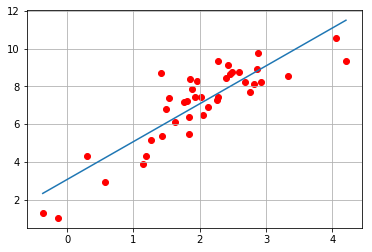

In [100]:
X_ord = np.sort(X)

plt.scatter(X,Y, color = 'r')
plt.plot(X_ord,X_ord*beta + alfa)
plt.grid(True)